# Grouping modules by T1D progression categories (P, M, R)

This notebook produces bloxpot for each LV from all RNA sequences in , M, R groups

Sakaiza Rasolofomanana Rajery

12/19/2024

# load packages

In [1]:
library(tidyverse, warn.conflicts = FALSE)
library(reticulate)
library("ggpubr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# load data: RNA_seq_projection, RNA_pheno_file,

### RNA_pheno_file

In [2]:
# path to DAISY rna dataset
path_to_rna <- "/Users/rasolofs/Library/CloudStorage/OneDrive-TheUniversityofColoradoDenver/DAISY RNA Phenoplier"

### Chose timepoint to work with

In [3]:
tp <- "1"
#tp <- "2" 
#tp <- "diff"

In [4]:
# importing phenotype file
RNA_pheno <- read_csv(paste0(path_to_rna,"/DAISY_RNASeq_Phenotype_Deidentified.csv"), col_types = cols())
dim(RNA_pheno)
head(RNA_pheno,1)
# see how many people among 136 were maintainer, reverter, progresser. 
patient_per_group <- RNA_pheno%>%
group_by(Group)%>%
summarize(n= n())

patient_per_group

[1] 136  22

ID,Group,Freezer_Time,Female_YN,Multiple_DAISY_Baseline,S_W,NHW_YN,dr34_YN,FDR_YN,Age,⋯,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00041-0,Maintainer,11.6797,0,0,0.7595215,1,1,1,17.1307,⋯,-0.0067,-0.0068,0.0137,-0.0646,0.0774,-0.004,-6e-04,-0.1208,-0.0602,0.0387


Group,n
<chr>,<int>
Maintainer,64
Progressor,25
Reverter,47


### RNA_seq_projection 

In [5]:
# importing results from projection og DAISY RNAseq visit 1 into Phenoplier latent space
#RNA_proj <- readRDS("output/projection_1.rds")
RNA_proj <- readRDS(paste0("output/projection_",tp,".rds"))
dim(RNA_proj)
head(RNA_proj,1)

[1] 987 136

,00041-0,00110-0,00139-0,00159-0,00174-0,00177-0,00181-0,00234-0,00250-0,00266-0,⋯,39376-0,39390-0,50136-0,62291-0,81801-0,84002-0,84689-0,84731-0,84860-0,85365-0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"1,REACTOME_MRNA_SPLICING",0.04574803,-0.08426191,-0.07769718,-0.0785392,0.02201515,0.1149033,0.03391685,-0.0007790358,-0.05505385,0.3072235,⋯,-0.02080513,0.2000519,0.07453577,0.07904688,-0.1166134,-0.02416923,-0.0259985,0.03331409,0.03902,-0.03954799


In [6]:
# transposing projection output data to get LV names, check we have 987 LV
RNA_proj_t <- data.frame(t(RNA_proj))
LV_names <- colnames(RNA_proj_t)
length(LV_names)
head(RNA_proj_t,1)

[1] 987

,X1.REACTOME_MRNA_SPLICING,X2.SVM.Monocytes,X3.REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES,X4.REACTOME_NEURONAL_SYSTEM,LV.5,LV.6,X7.IRIS_Neutrophil.Resting,X8.KEGG_PPAR_SIGNALING_PATHWAY,LV.9,X10.SVM.Macrophages.M0,⋯,LV.978,LV.979,LV.980,LV.981,LV.982,LV.983,LV.984,X985.IRIS_Neutrophil.Resting,LV.986,LV.987
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00041-0,0.04574803,0.1043078,-0.03433878,0.05637729,-0.006014439,0.01314159,-0.1586993,-0.01485901,-0.03240155,-0.01260643,⋯,0.03144701,0.03413777,0.03699688,0.03995319,0.0001208903,0.008096008,-0.2865023,-0.1601038,-0.01649698,-0.0185753


In [7]:
# convert matrix to dataframe with gene as rownames
RNA_proj_t <- cbind(ID = colnames(RNA_proj), t(RNA_proj))
# merge transposed RNA projection output with each individual's T1D groupping
RNA_proj_group <- merge(RNA_proj_t, RNA_pheno[,1:2], by = "ID")

head(RNA_proj_group,1)
#set rownames of new dataframe to ensembleID
#rownames(EnsID_df) <- EnsID_df$EnsemblID
#remove gene and ensembleID column
#z_matrix <- as.matrix(EnsID_df[, !(colnames(EnsID_df) %in% c("gene", "EnsemblID"))])

colnames(RNA_proj_group)[2:988] <- LV_names
#this <- RNA_proj_group[,LV_col]
#convert all LV col into numeric
RNA_proj_group[,LV_names] <- sapply(RNA_proj_group[,LV_names], function(x) as.numeric(as.character(x)))
head(RNA_proj_group,1)                                

,ID,"1,REACTOME_MRNA_SPLICING","2,SVM Monocytes","3,REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES","4,REACTOME_NEURONAL_SYSTEM",LV 5,LV 6,"7,IRIS_Neutrophil-Resting","8,KEGG_PPAR_SIGNALING_PATHWAY",LV 9,⋯,LV 979,LV 980,LV 981,LV 982,LV 983,LV 984,"985,IRIS_Neutrophil-Resting",LV 986,LV 987,Group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,00041-0,0.0457480278618545,0.104307803997094,-0.0343387810812294,0.0563772940511535,-0.00601443873788704,0.0131415923542836,-0.158699343815803,-0.0148590123869055,-0.0324015452803633,⋯,0.0341377696526231,0.0369968809716986,0.0399531904071989,0.000120890312327077,0.00809600831257625,-0.286502322428617,-0.160103774690203,-0.016496983906286,-0.0185753019267175,Maintainer


,ID,X1.REACTOME_MRNA_SPLICING,X2.SVM.Monocytes,X3.REACTOME_TRANSMISSION_ACROSS_CHEMICAL_SYNAPSES,X4.REACTOME_NEURONAL_SYSTEM,LV.5,LV.6,X7.IRIS_Neutrophil.Resting,X8.KEGG_PPAR_SIGNALING_PATHWAY,LV.9,⋯,LV.979,LV.980,LV.981,LV.982,LV.983,LV.984,X985.IRIS_Neutrophil.Resting,LV.986,LV.987,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,00041-0,0.04574803,0.1043078,-0.03433878,0.05637729,-0.006014439,0.01314159,-0.1586993,-0.01485901,-0.03240155,⋯,0.03413777,0.03699688,0.03995319,0.0001208903,0.008096008,-0.2865023,-0.1601038,-0.01649698,-0.0185753,Maintainer


In [8]:
# order groupping factor
RNA_proj_group$Group <- ordered(RNA_proj_group$Group,
                         levels = c("Maintainer", "Reverter", "Progressor"))

# correct column name 
#LV_names<- colnames(RNA_proj_group)[2:988]

remove_dot <- which(str_detect(LV_names, "LV."))
remove_pathway <- which(!str_detect(LV_names, "LV."))
LV_names[remove_pathway] <- gsub("\\..*","",LV_names[remove_pathway])
LV_names[remove_pathway] <- gsub("X","LV",LV_names[remove_pathway])
LV_names[remove_dot] <- gsub("\\.","",LV_names[remove_dot])

colnames(RNA_proj_group)[2:988]<- LV_names
head(RNA_proj_group,5)

saveRDS(RNA_proj_group,paste0("output/gp_RNA_proj_",tp,".rds"))

,ID,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,⋯,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,00041-0,0.04574803,0.104307804,-0.034338781,0.05637729,-0.006014439,0.013141592,-0.15869934,-0.014859012,-0.03240155,⋯,0.034137770,0.036996881,0.039953190,0.0001208903,0.008096008,-0.28650232,-0.16010377,-0.016496984,-0.01857530,Maintainer
2,00110-0,-0.08426191,0.026277343,-0.021415299,0.04507367,0.007702120,0.040915288,0.06129902,0.032181881,-0.08186520,⋯,-0.008798991,-0.005897529,-0.023566109,-0.0156890102,-0.030152906,-0.47237525,0.16645707,0.005320207,0.04090875,Reverter
3,00139-0,-0.07769718,-0.049913741,-0.102291965,0.09735670,-0.023535277,0.033234436,-0.06710881,0.008868332,-0.08689146,⋯,0.004060664,0.012191500,0.008133505,0.0115797178,0.007200402,-0.01228895,0.16295813,0.020930740,0.02287022,Reverter
4,00159-0,-0.07853920,0.266457766,-0.004261070,0.04125927,0.010785959,-0.026479309,0.04325244,0.005756415,-0.02808686,⋯,0.016373535,0.006476112,0.025129735,0.0283485458,-0.022585673,-0.36083597,0.18419112,-0.050503989,0.03623584,Maintainer
5,00174-0,0.02201515,-0.008530261,-0.006897807,0.02745358,0.017448294,-0.004379551,-0.08090162,-0.007961799,-0.01346758,⋯,-0.003171649,-0.009250876,0.007137157,-0.0076687468,0.021669337,0.01658212,-0.01654707,-0.009357040,-0.02263874,Progressor


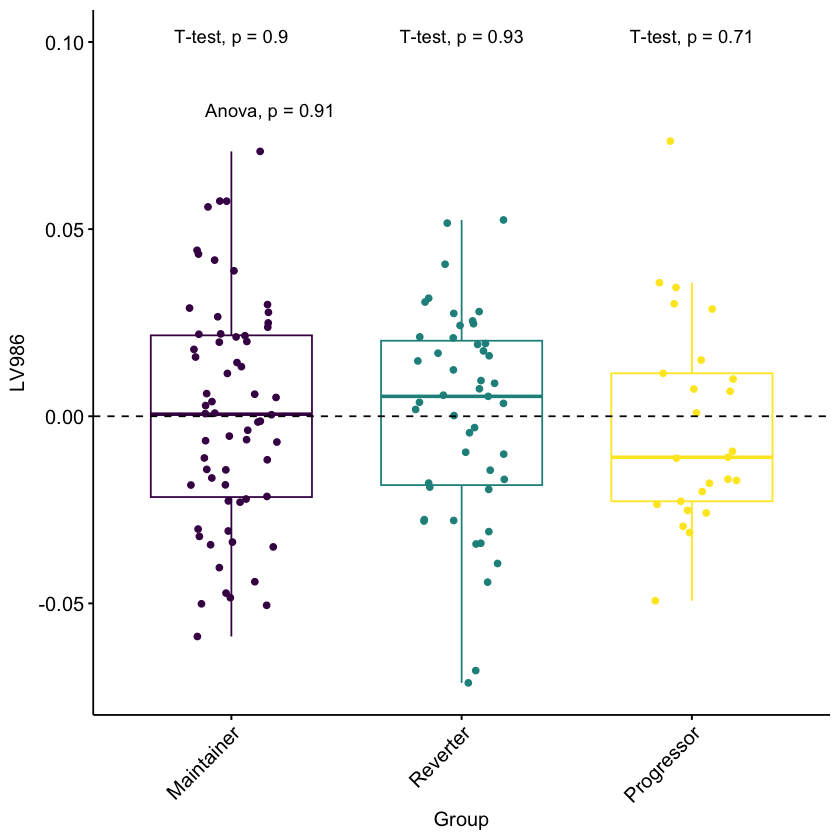

In [9]:
# boxplot one LV by group, and compute anova p-value
ggboxplot(RNA_proj_group, x = "Group", y = "LV986", color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(RNA_proj_group$LV986), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = 0.08)+        # Add global annova p-value
  stat_compare_means(method = "t.test",
                     ref.group = ".all.",label.y = c(0.10,0.10,0.10))  

In [11]:
# compute anova for each LV

res <- data.frame(matrix(nrow = 0, ncol = 6))

# compare each group to the mean expression accross all three groups
for (i in 1:length(LV_names)){
    comp_i <- compare_means(as.formula(paste0(LV_names[i]," ~ Group")),  data = RNA_proj_group,
                            method = "anova")
    res <- rbind(res, comp_i)
    }
res_formated <- res[,c(1,2)]
colnames(res_formated) <- c("LV","p_val")
res_formated$fdr <- p.adjust(res_formated$p_val, method = "BH")
head(res_formated,5)

saveRDS(res_formated,paste0("output/anova_",tp,".rds"))

LV,p_val,fdr
<chr>,<dbl>,<dbl>
LV1,0.7352670,0.9779212
LV2,0.2834517,0.9428521
LV3,0.3610785,0.9605245
LV4,0.7746374,0.9779212
LV5,0.4303579,0.9679793


In [12]:
top_LV_daisy <- res_formated[res_formated$fdr < 0.5,]
nrow(top_LV_daisy)
top_LV_daisy

[1] 0

LV,p_val,fdr
<chr>,<dbl>,<dbl>


In [12]:
#takes 7 minutes to run
for (i in 1:length(LV_names)){
    plot_i <- ggboxplot(RNA_proj_group, x = "Group", y = LV_names[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(RNA_proj_group[,LV_names[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = 0.08)+        # Add global annova p-value
  #stat_compare_means(label = "p.signif", method = "t.test",
                     #ref.group = ".all.") 
    
    ggsave(paste0("LV_",i,"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    dev.off()

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x

null device 
          1